In [ ]:
### Header

# 2 - Exploratory data analysis

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("../data/ctg_pp.csv")
data_copy = data.copy() # create checkpoint

data_std = pd.read_csv("../data/ctg_pp_standardized.csv")
data_std_copy = data_std.copy() # create checkpoint

In [16]:
data, data_std

(         LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    Max  \
 0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  126.0   
 1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  198.0   
 2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  198.0   
 3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  170.0   
 4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  170.0   
 ...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...    ...   
 2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  ...  177.0   
 2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  ...  169.0   
 2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  ...  170.0   
 2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  ...  169.0   
 2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  ...  159.0   
 
       Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  NSP 

### Correlation plots

<AxesSubplot:>

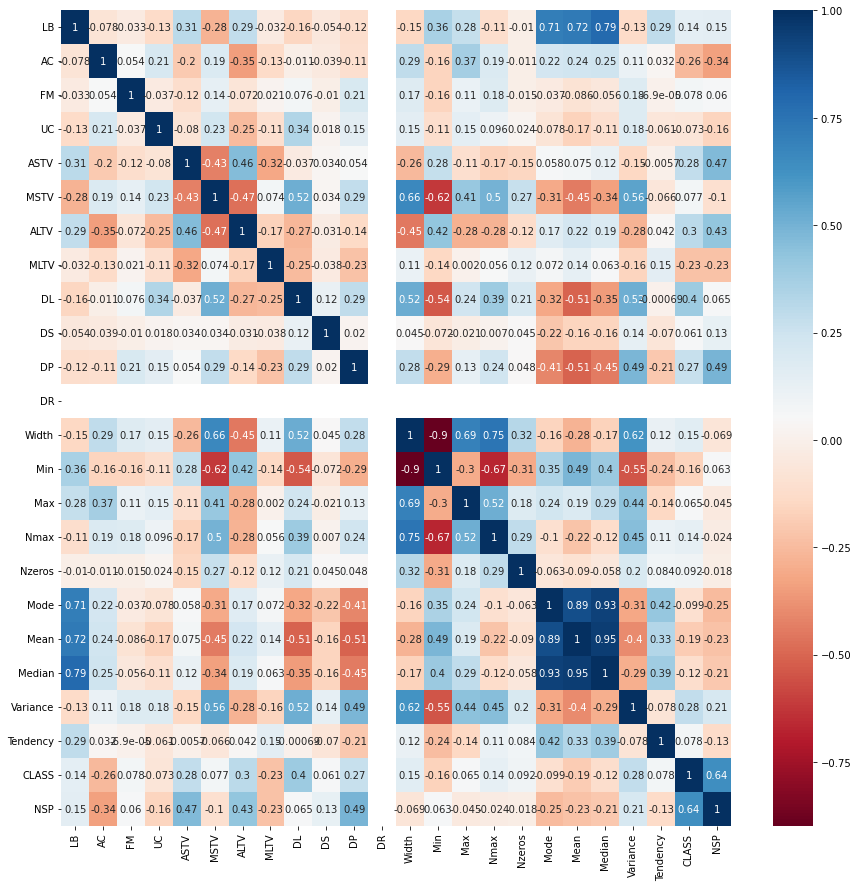

In [26]:
corr = data.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='RdBu', ax = ax)

In [10]:
# There seems to be a problem with DR (repetitive decelerations)
# We know for sure that the values are not missing...
print(data["DR"].describe())

# Since they're all zeroes, this variable does not add any information so we can remove it from the dataset
data.drop("DR", axis = "columns", inplace = True)

count    2126.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DR, dtype: float64


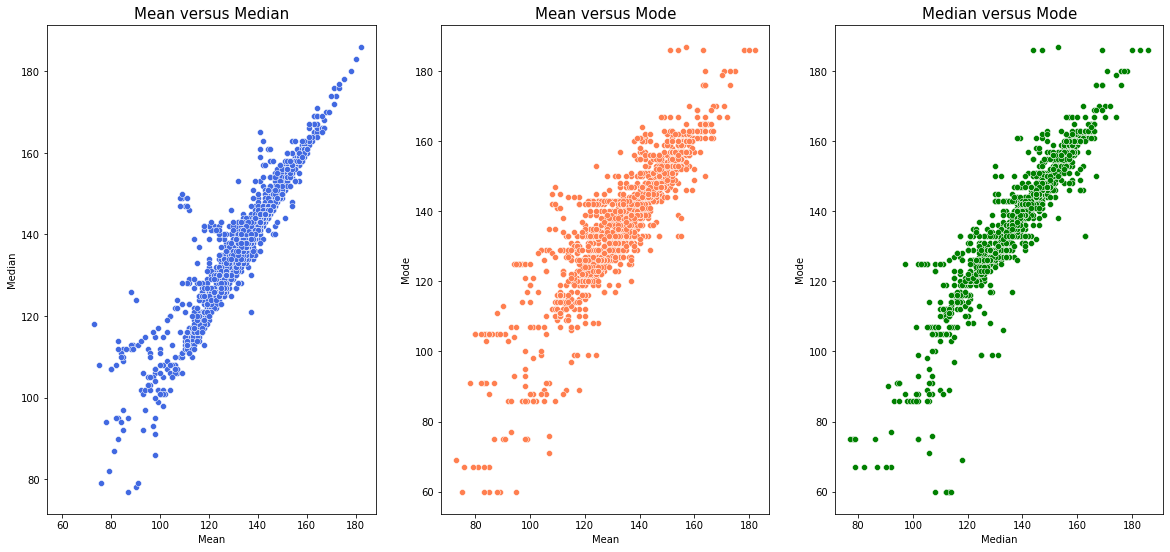

In [34]:
# In addition, we see that the mean, median and mode of the histograms are highly correlated...
# This is expected if their distribution is normal. We will further look into this correlation with scatterplots
fig, g = plt.subplots(1, 3, figsize=(20,9))

g1 = sns.scatterplot(data = data, x = "Mean", y = "Median", color='royalblue', ax = g[0])
g1.set_title("Mean versus Median", size=15)
g1.plot([60, 60], [180, 180], linewidth=2)


g2 = sns.scatterplot(data = data, x = "Mean", y = "Mode", color='coral', ax=g[1])
g2.set_title("Mean versus Mode", size=15);

g3 = sns.scatterplot(data = data, x = "Median", y = "Mode", color='green', ax=g[2])
g3.set_title("Median versus Mode", size=15);
